In [320]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [321]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [323]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [324]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [325]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of the product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [327]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [328]:
# 1. 특정 범위 설정
x_min, x_max = 1000, 2000
y_min, y_max = 0, 10
# 2. 조건에 맞는 데이터 필터링
subset = df[
    (df['Weight_in_gms'] >= x_min) & (df['Weight_in_gms'] <= x_max) & 
    (df['Discount_offered'] >= y_min) & (df['Discount_offered'] <= y_max)
]
# 3. 개수 출력
count = len(subset)
print(f"해당 영역({x_min}~{x_max}, {y_min}~{y_max}) 내의 점 개수: {count}개")
print(f"그 중 배송 지연(target=1)인 개수: {subset['target'].sum()}개")

해당 영역(1000~2000, 0~10) 내의 점 개수: 2123개
그 중 배송 지연(target=1)인 개수: 1077개


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [329]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

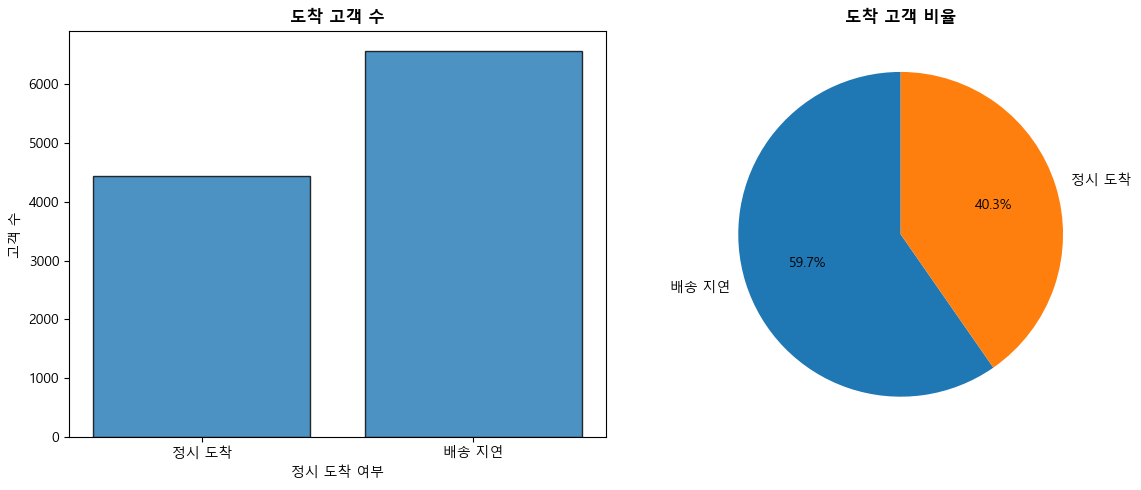

In [330]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar(df['target'].unique(), class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'])
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['배송 지연', '정시 도착'] 
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [331]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

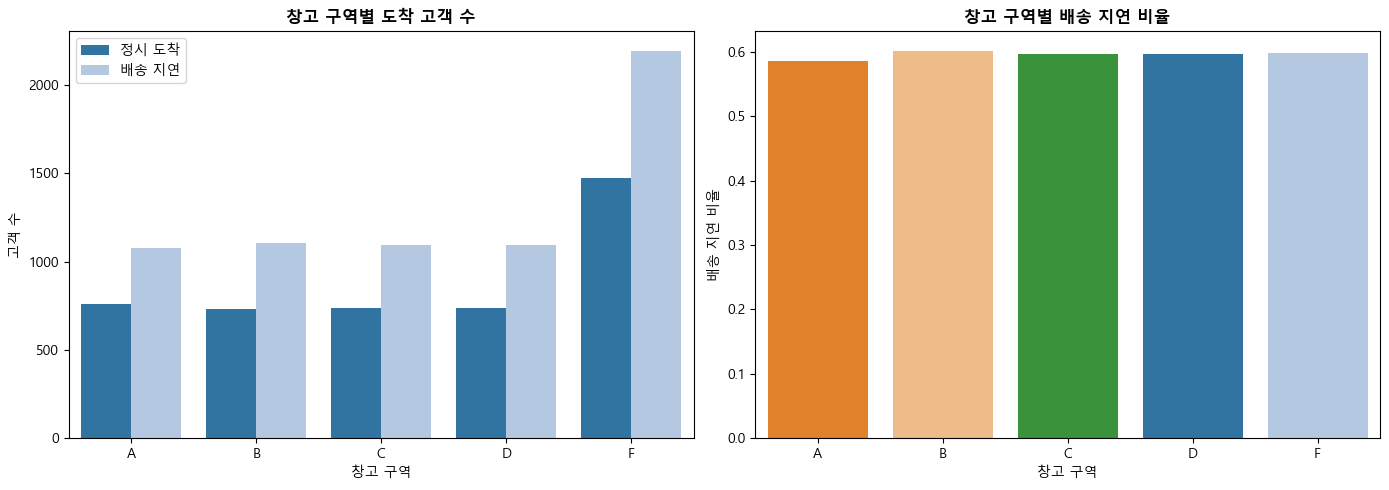

In [332]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

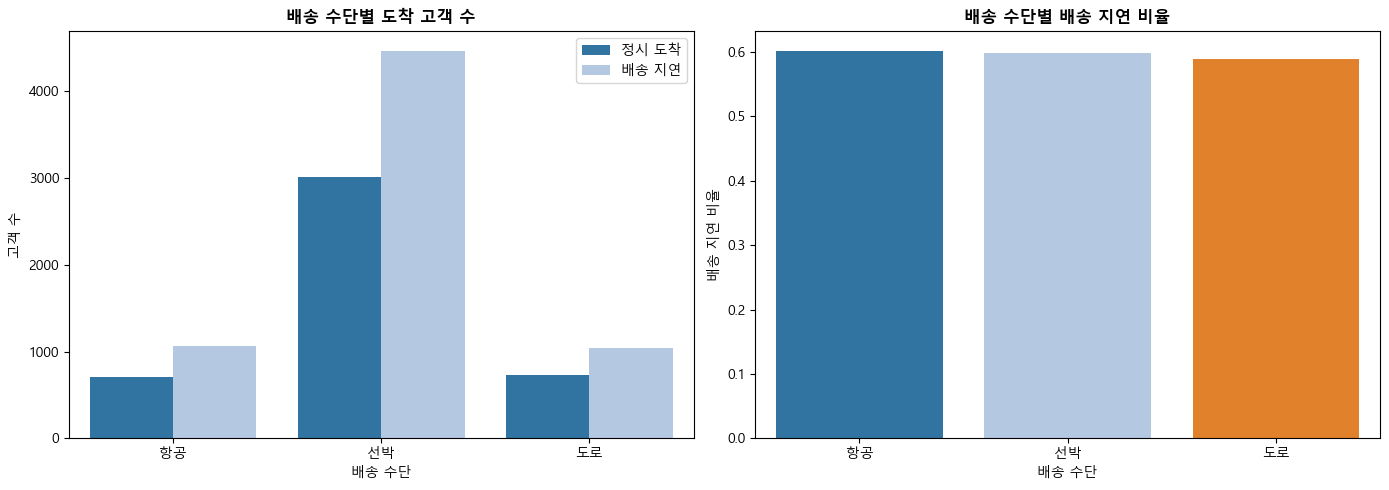

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['항공', '선박','도로'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['항공', '선박','도로'])
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

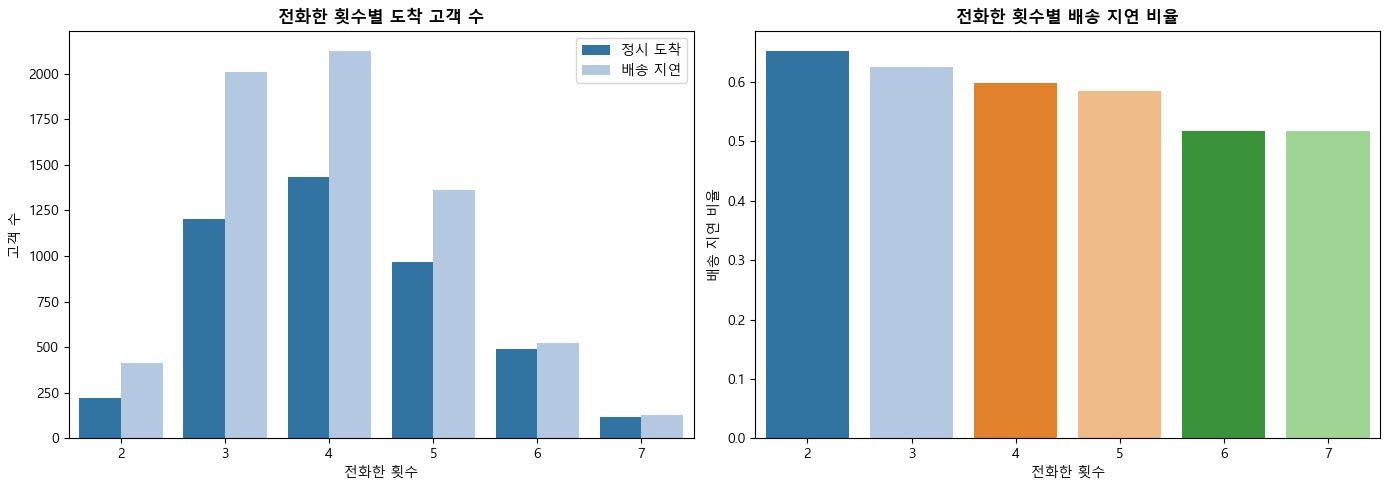

In [334]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

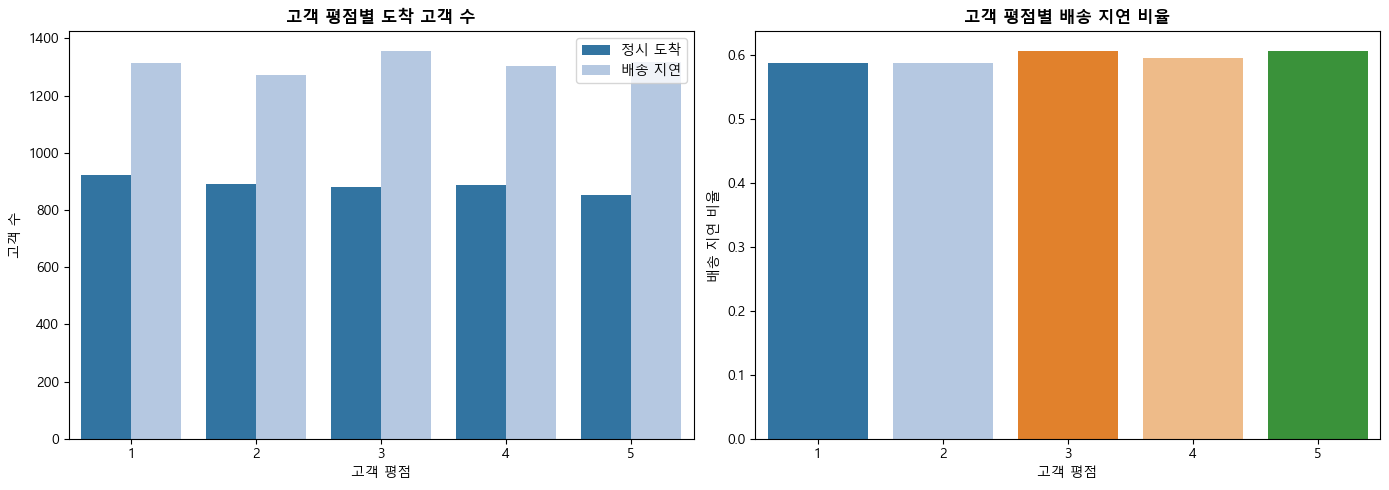

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

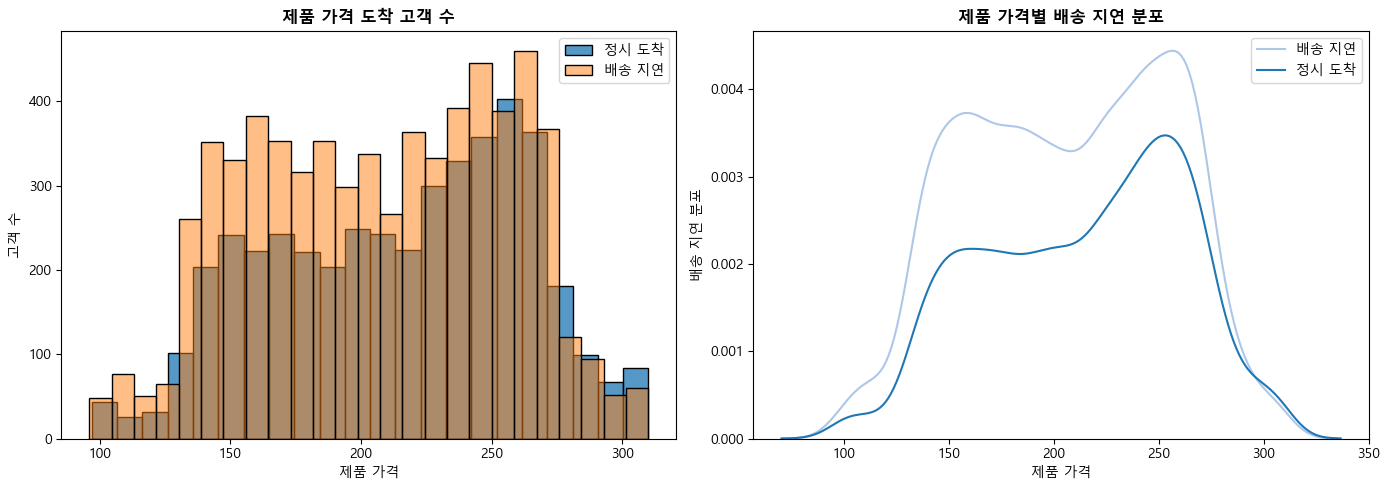

In [336]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

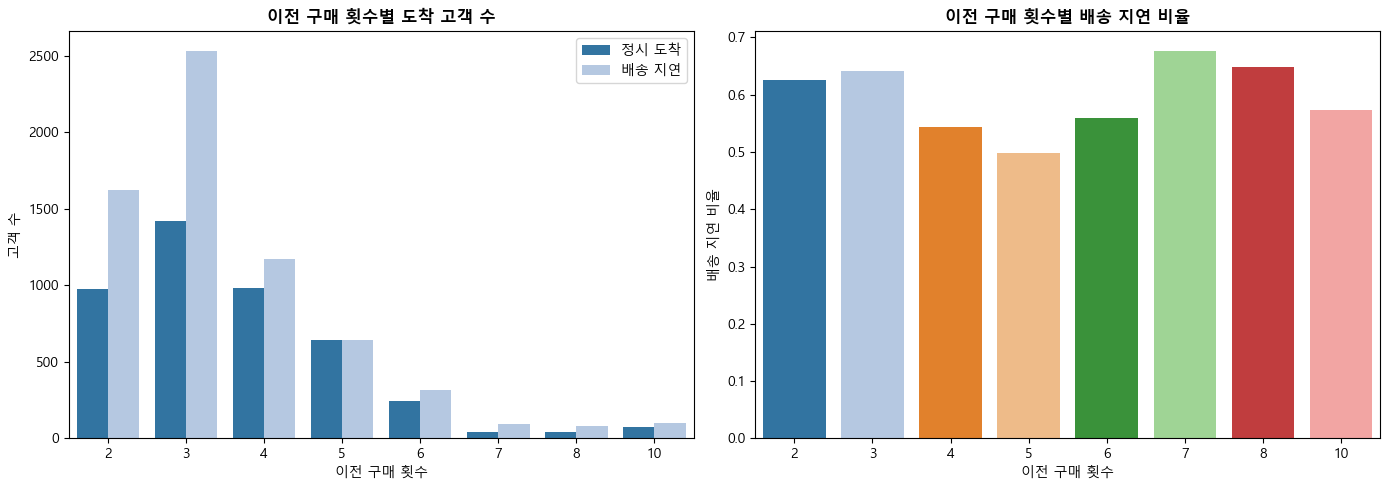

In [337]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

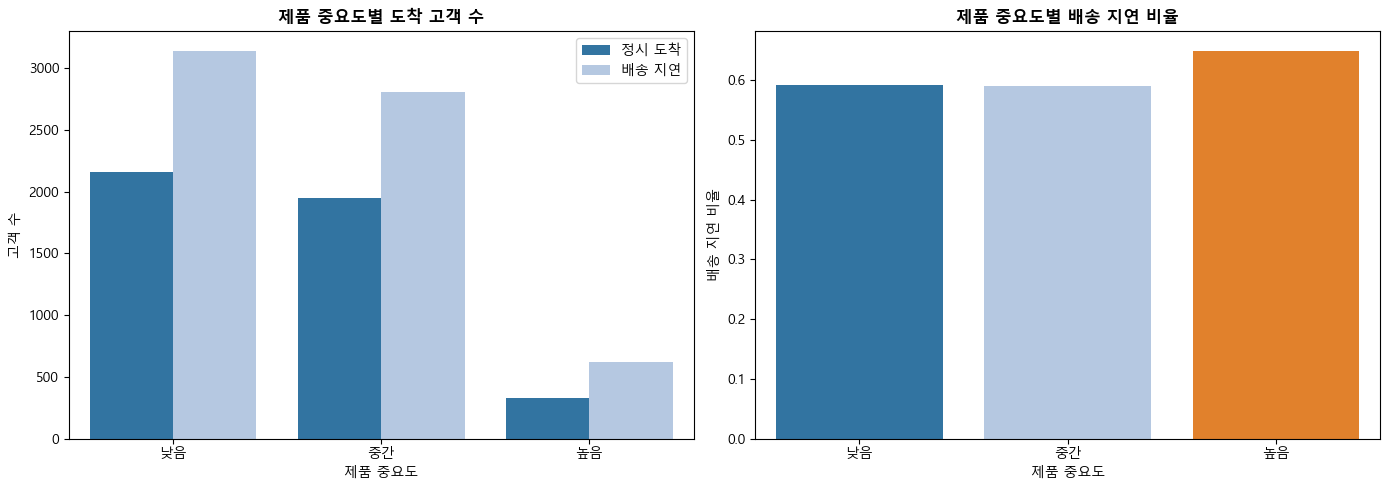

In [338]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['낮음', '중간', '높음'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['낮음', '중간', '높음'])
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

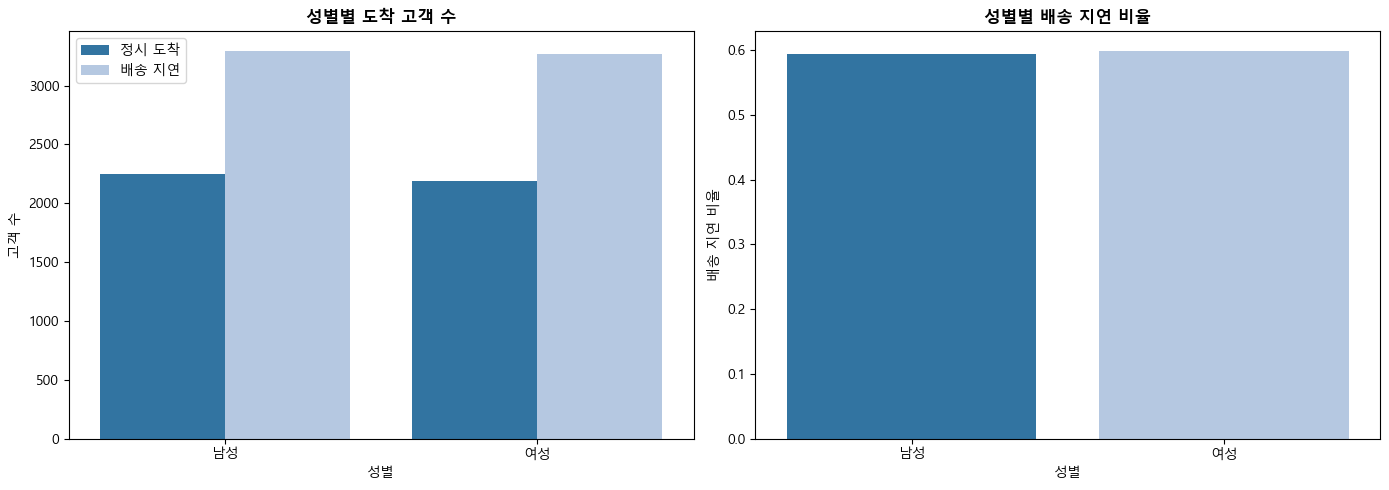

In [339]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

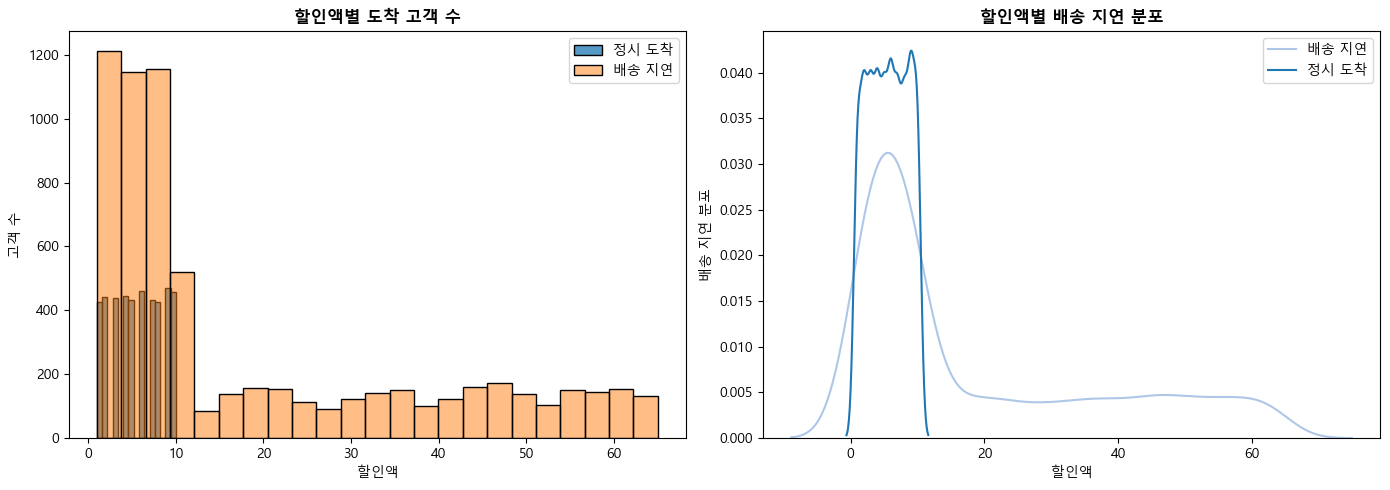

In [340]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

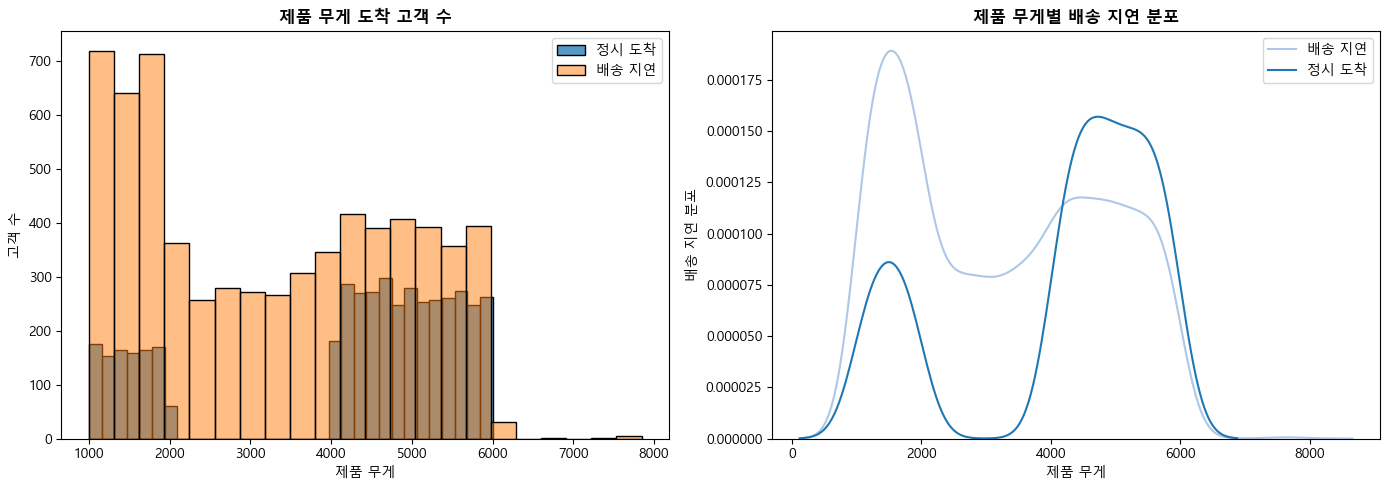

In [341]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

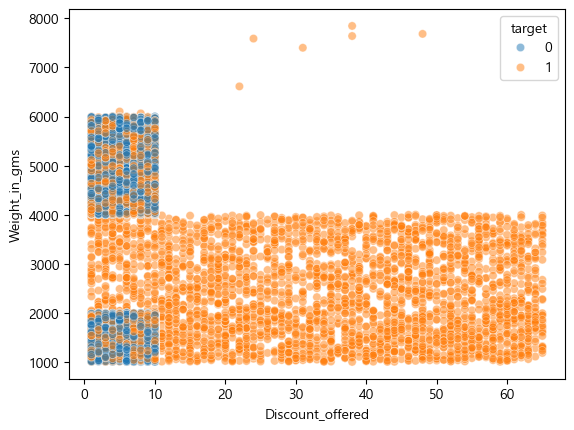

In [342]:
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', hue='target', data=df, alpha=0.5)
plt.show()

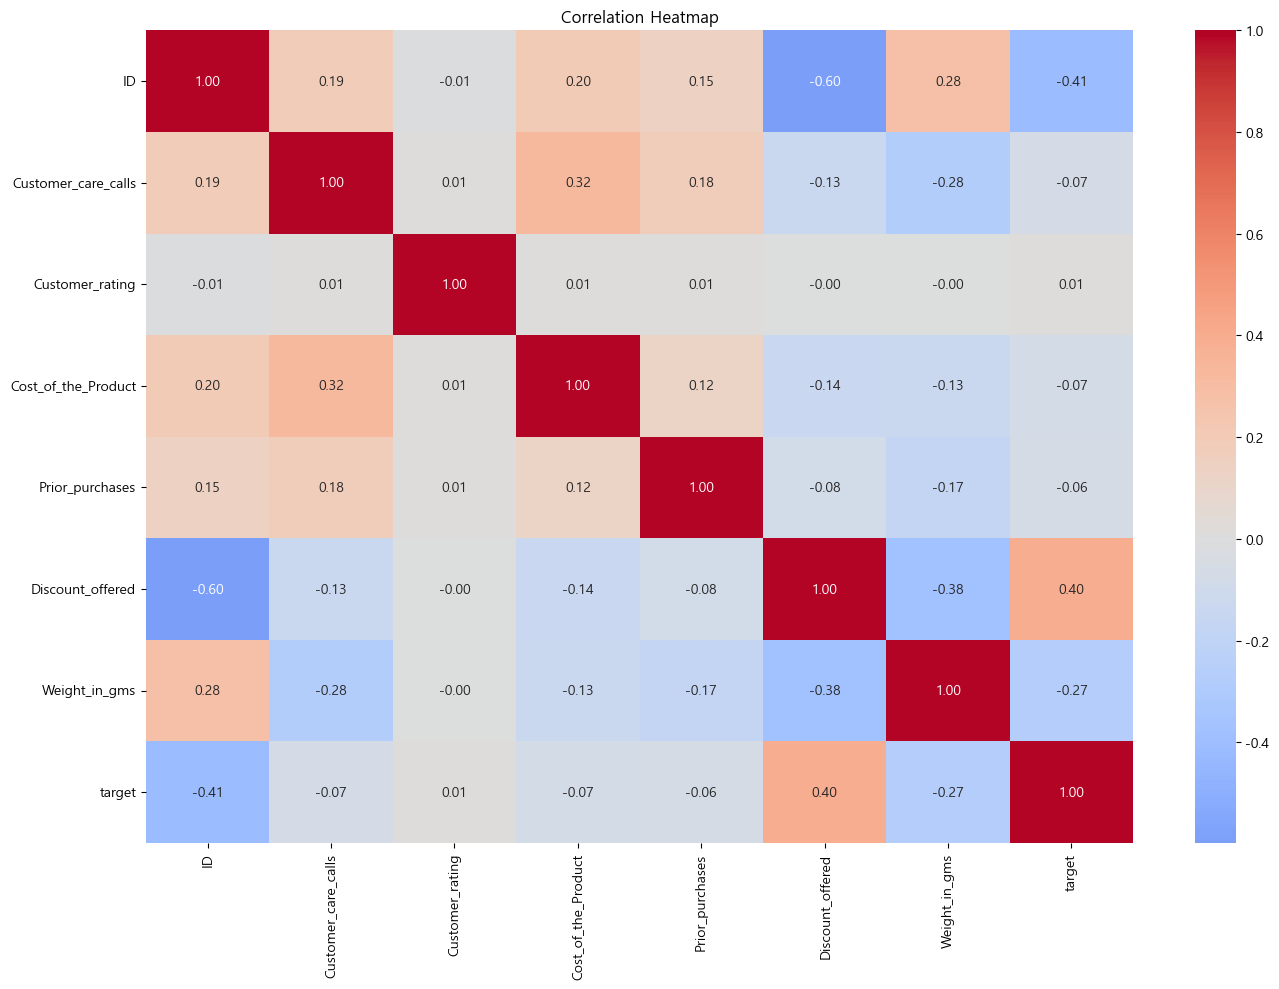

In [343]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 2. 특성 엔지니어링

In [344]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  target               10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


In [345]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(['target','ID'], axis=1)
y_total = df['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [346]:
# sklearn의 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.19692677989665272
Mean Absolute Error: 0.4111583092402553
Root Mean Squared Error: 0.44376432922966297


In [347]:
# 최종 금액
df['Final_Cost'] = df['Cost_of_the_Product']*(100-df['Discount_offered'])/100
# 가격 대비 무게 (단위 가격당 무게 밀도)
df['Weight_per_Cost'] = df['Weight_in_gms'] / df['Cost_of_the_Product']
# 할인
df['Discount_Bin'] = pd.cut(df['Discount_offered'], bins=[0, 10,100], labels=['10%', '10%~80%'])
# 무게의 구분
df['Weight_Bin'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000,4000,8000], labels=['Low', 'Medium', 'High'])

In [ ]:
# 1. 구매 당 할인액 (단골 고객 혜택 지표)
# 이전 구매 횟수가 많은 고객에게 할인이 얼마나 집중되었는지 확인
df['Discount_per_Purchase'] = df['Discount_offered'] / (df['Prior_purchases'] + 1)

# 2. 문의 당 무게 (배송 관리 부하 지표)
# 무거운 물건일수록 문의 전화가 많았는지, 아니면 무거운데도 문의가 적었는지 측정
df['Weight_per_Call'] = df['Weight_in_gms'] / (df['Customer_care_calls'] + 1)

# 3. 무게당 할인액 (무게 대비 가성비 지표)
# 가벼운 물건에 할인이 몰렸는지, 무거운 물건에 할인이 몰렸는지 확인 (배송 우선순위와 관련)
df['Discount_per_Gram'] = df['Discount_offered'] / df['Weight_in_gms']

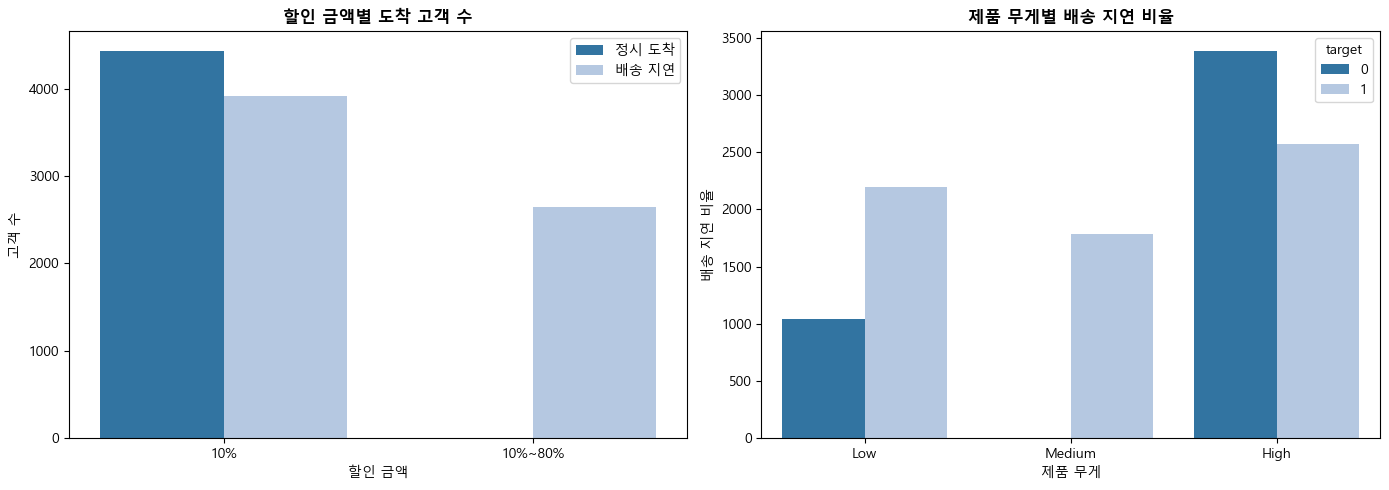

In [349]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Discount_Bin', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('할인 금액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['10%', '10%~80%'])
axes[0].set_xlabel('할인 금액')
axes[0].set_ylabel('고객 수')

sns.countplot(x='Weight_Bin', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Low', 'Medium', 'High'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     10999 non-null  int64   
 1   Warehouse_block        10999 non-null  int64   
 2   Mode_of_Shipment       10999 non-null  int64   
 3   Customer_care_calls    10999 non-null  int64   
 4   Customer_rating        10999 non-null  int64   
 5   Cost_of_the_Product    10999 non-null  int64   
 6   Prior_purchases        10999 non-null  int64   
 7   Product_importance     10999 non-null  int64   
 8   Gender                 10999 non-null  int64   
 9   Discount_offered       10999 non-null  int64   
 10  Weight_in_gms          10999 non-null  int64   
 11  target                 10999 non-null  int64   
 12  Final_Cost             10999 non-null  float64 
 13  Weight_per_Cost        10999 non-null  float64 
 14  Discount_Bin           10999 non-null 

* 라벨 인코딩(Label Encoding)

In [351]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10999 non-null  int64  
 1   Warehouse_block        10999 non-null  int64  
 2   Mode_of_Shipment       10999 non-null  int64  
 3   Customer_care_calls    10999 non-null  int64  
 4   Customer_rating        10999 non-null  int64  
 5   Cost_of_the_Product    10999 non-null  int64  
 6   Prior_purchases        10999 non-null  int64  
 7   Product_importance     10999 non-null  int64  
 8   Gender                 10999 non-null  int64  
 9   Discount_offered       10999 non-null  int64  
 10  Weight_in_gms          10999 non-null  int64  
 11  target                 10999 non-null  int64  
 12  Final_Cost             10999 non-null  float64
 13  Weight_per_Cost        10999 non-null  float64
 14  Discount_Bin           10999 non-null  int64  
 15  We

* 원-핫 인코딩(One-Hot Encoding)

In [352]:
df = pd.get_dummies(df, columns=['Discount_Bin','Weight_Bin'])


In [353]:
df = df.drop(['Cost_of_the_Product','Discount_offered','Weight_in_gms'], axis=1)

In [354]:
df = df.drop(['Gender','ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Prior_purchases','Product_importance'], axis=1)

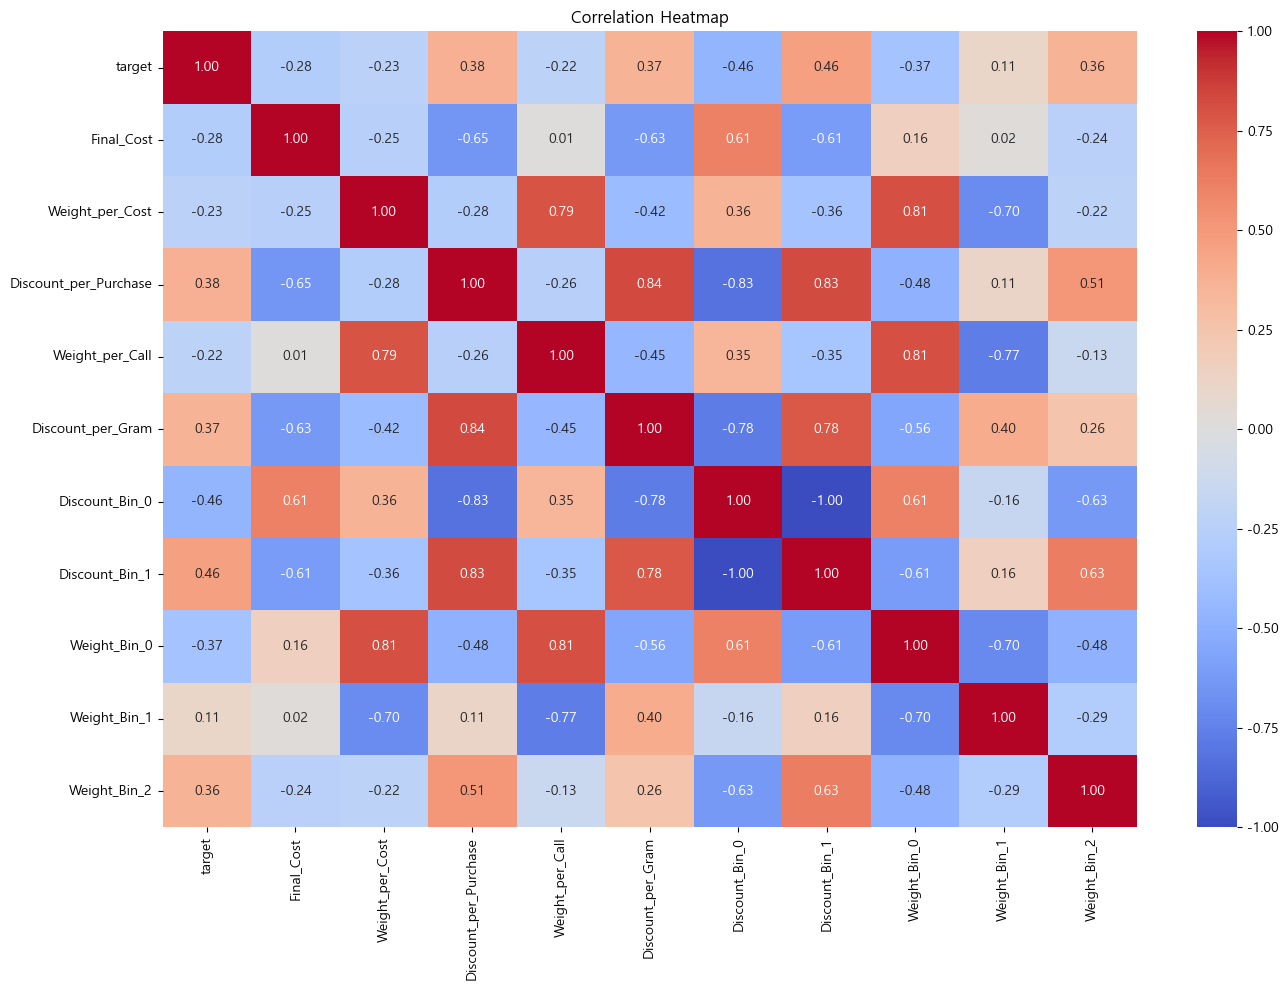

In [355]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [356]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [357]:
# sklearn의 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.18217712045092954
Mean Absolute Error: 0.3789186536375683
Root Mean Squared Error: 0.4268221180432541


In [358]:
df.describe().round(4)

,target,Final_Cost,Weight_per_Cost,Discount_per_Purchase,Weight_per_Call,Discount_per_Gram
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,0.5967,183.1640,18.5173,3.3043,774.2859,0.0060
std,0.4906,56.9073,10.1089,4.3367,411.3648,0.0094
min,0.0000,36.6300,3.2355,0.0909,125.3750,0.0002
25%,0.0000,140.1500,9.6660,0.8000,366.3250,0.0009
50%,1.0000,186.2400,18.2098,1.6000,813.2000,0.0017
75%,1.0000,231.2800,25.1438,3.0000,1077.5000,0.0062
max,1.0000,306.9000,60.6735,21.6667,2615.3333,0.0595


* 표준화(Standardization)

In [359]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Final_Cost'] = standard_scaler.fit_transform(df['Final_Cost'].values.reshape(-1,1))


df['Weight_per_Cost'] = standard_scaler.fit_transform(df['Weight_per_Cost'].values.reshape(-1,1))
df['Weight_per_Call'] = standard_scaler.fit_transform(df['Weight_per_Call'].values.reshape(-1,1))


df.describe().round(4)

,target,Final_Cost,Weight_per_Cost,Discount_per_Purchase,Weight_per_Call,Discount_per_Gram
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,0.5967,-0.0000,0.0000,3.3043,0.0000,0.0060
std,0.4906,1.0000,1.0000,4.3367,1.0000,0.0094
min,0.0000,-2.5751,-1.5118,0.0909,-1.5775,0.0002
25%,0.0000,-0.7559,-0.8756,0.8000,-0.9918,0.0009
50%,1.0000,0.0541,-0.0304,1.6000,0.0946,0.0017
75%,1.0000,0.8456,0.6555,3.0000,0.7371,0.0062
max,1.0000,2.1744,4.1704,21.6667,4.4757,0.0595


In [360]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [361]:
# sklearn의 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 1. 모델 생성
model = LinearRegression()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.1821771204509296
Mean Absolute Error: 0.3789186536375686
Root Mean Squared Error: 0.42682211804325415


### 데이터 분석 전

튜닝 전<br>
Mean Squared Error: 0.19697356613700426<br>
Mean Absolute Error: 0.41118743677561753<br>
Root Mean Squared Error: 0.4438170412872902<br>
<br>
튜닝 후<br>
Mean Squared Error: 0.18729059217672656<br>
Mean Absolute Error: 0.3839014884669972<br>
Root Mean Squared Error: 0.4327708310142061



### 데이터 분석 후

튜닝 전<br>
Mean Squared Error: 0.19692677989665272<br>
Mean Absolute Error: 0.4111583092402553<br>
Root Mean Squared Error: 0.44376432922966297<br>

튜닝 후<br>
Mean Squared Error: 0.1821771204509296<br>
Mean Absolute Error: 0.3789186536375686<br>
Root Mean Squared Error: 0.42682211804325415

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# X_train과 y_train 합치기
t

In [3]:
train_ag_data, val_ag_data = train_test_split(
    train_ag, test_size=0.2, random_state=42
)

NameError: name 'train_test_split' is not defined

In [ ]:
predictor_medium = TabularPredictor(
    label=target_col,                    # 타겟 변수
    problem_type='regression',           # 회귀 문제
    eval_metric='root_mean_squared_error',  # 평가 지표
    path='AutoGluon_medium'              # 모델 저장 경로
)

# 모델 학습
predictor_medium.fit(
    train_data=train_ag_data,
    tuning_data=val_ag_data,             # 검증 데이터
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2                          # 로그 상세도
)